In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input,decode_predictions
from keras.preprocessing import image
from keras.layers import Lambda, Dense, Flatten
from keras.models import Model
from glob import glob
import PIL
from PIL import Image
import os
import cv2
import random

In [38]:
Train_path = './pizza_not_pizza/Train/'
Test_path = './pizza_not_pizza/Test'
IMAGE_SIZE = [224,224]

In [39]:
folder = glob('./pizza_not_pizza/Train/')

In [40]:
Train_generation = ImageDataGenerator(rescale=1./25,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
Test_generation = ImageDataGenerator(rescale=1./25)

In [41]:
training_set = Train_generation.flow_from_directory('./pizza_not_pizza/Train/',
                                                    color_mode= 'rgb',
                                                    shuffle= True,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')
testing_set = Test_generation.flow_from_directory('./pizza_not_pizza/Test/',
                                                    color_mode= 'rgb',
                                                    shuffle= True,
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1376 images belonging to 2 classes.
Found 590 images belonging to 2 classes.


In [42]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) 
prediction = Dense(len(folder), activation='sigmoid')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [43]:
vgg.input.shape

TensorShape([None, 224, 224, 3])

In [44]:
prediction.shape

TensorShape([None, 1])

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(training_set, validation_data=testing_set, epochs = 12
                    
                    , batch_size=64
                    )

Epoch 1/12
43/43 [==============================] - 1179s 28s/step - loss: 0.4131 - accuracy: 0.8140 - val_loss: 0.2625 - val_accuracy: 0.9051
Epoch 2/12
43/43 [==============================] - 1098s 26s/step - loss: 0.1862 - accuracy: 0.9244 - val_loss: 0.2611 - val_accuracy: 0.9119
Epoch 3/12
43/43 [==============================] - 1199s 28s/step - loss: 0.1542 - accuracy: 0.9295 - val_loss: 0.3027 - val_accuracy: 0.9051
Epoch 4/12
43/43 [==============================] - 784s 18s/step - loss: 0.1078 - accuracy: 0.9557 - val_loss: 0.2356 - val_accuracy: 0.9186
Epoch 5/12
43/43 [==============================] - 718s 17s/step - loss: 0.0834 - accuracy: 0.9695 - val_loss: 0.2541 - val_accuracy: 0.9203
Epoch 6/12
43/43 [==============================] - 717s 17s/step - loss: 0.0854 - accuracy: 0.9666 - val_loss: 0.2393 - val_accuracy: 0.9237
Epoch 7/12
43/43 [==============================] - 844s 20s/step - loss: 0.0603 - accuracy: 0.9782 - val_loss: 0.2578 - val_accuracy: 0.9237
Epo

In [46]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

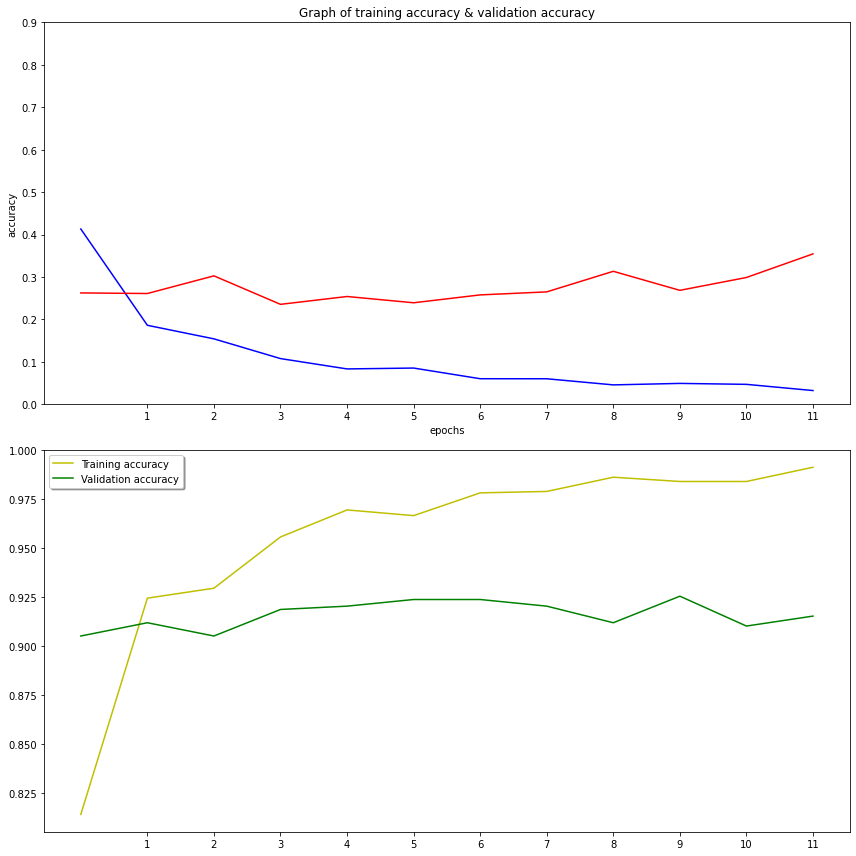

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# plot graph of training loss & validation loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 12, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_title("Graph of training loss & validation loss")

# plot graph of training accuracy & validation accuracy
ax2.plot(history.history['accuracy'], color='y', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 12, 1))
ax1.set_xlabel("epochs")
ax1.set_ylabel("accuracy")
ax1.set_title("Graph of training accuracy & validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

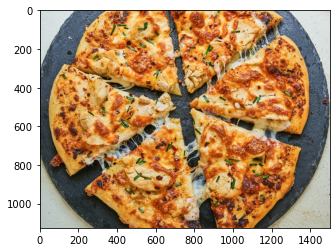

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pizza = mpimg.imread("k_Photo_Recipe Ramp Up_2021-07-Chicken-Alfredo-Pizza_Chicken-Alfredo-Pizza-KitchnKitchn2970-1_01.jpg")
plt.imshow(pizza)



In [61]:
pizza.shape

(1125, 1500, 3)

In [62]:
def load_and_prep_image(filename,img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size = [img_shape,img_shape])
    img = img/255.
    return img

In [64]:
pizza1 = load_and_prep_image('k_Photo_Recipe Ramp Up_2021-07-Chicken-Alfredo-Pizza_Chicken-Alfredo-Pizza-KitchnKitchn2970-1_01.jpg')
pizza1

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.827451  , 0.8666667 , 0.87058824],
        [0.8256653 , 0.864881  , 0.86880255],
        [0.80202204, 0.8412377 , 0.8451593 ],
        ...,
        [0.8392593 , 0.85886717, 0.8431809 ],
        [0.85102415, 0.8588673 , 0.83925945],
        [0.8546898 , 0.8782192 , 0.87037605]],

       [[0.8354254 , 0.87464106, 0.8785626 ],
        [0.8259877 , 0.8652034 , 0.86912495],
        [0.82901585, 0.86823153, 0.8721531 ],
        ...,
        [0.8081001 , 0.82770795, 0.80025697],
        [0.8170748 , 0.8271133 , 0.8031148 ],
        [0.8460893 , 0.8696187 , 0.85393244]],

       [[0.8274178 , 0.8666335 , 0.87055504],
        [0.827451  , 0.8666667 , 0.87058824],
        [0.85357165, 0.89278734, 0.8967089 ],
        ...,
        [0.80203915, 0.821647  , 0.8059607 ],
        [0.80784315, 0.81960785, 0.78431374],
        [0.8112024 , 0.8386534 , 0.8112024 ]],

       ...,

       [[0.71739453, 0.7566102 , 0.75268865],
        [0.72

In [65]:
pred = model.predict(tf.expand_dims(pizza1, axis=0))
pred

1/1 [==============================] - 1s 716ms/step


array([[0.798607]], dtype=float32)

In [66]:
import pathlib
data_dir = pathlib.Path('./pizza_not_pizza/Train/')
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['not pizza' 'pizza']


In [67]:
pred_class = class_name[int(tf.round(pred))]
pred_class

'pizza'

In [68]:
def pred_and_plot(model,filename,):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0)) 
    pred_class = class_name[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')

1/1 [==============================] - 0s 394ms/step


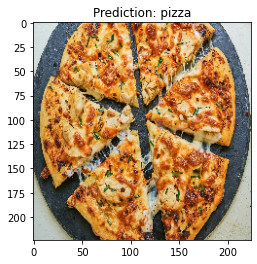

In [69]:
pred_and_plot(model,"k_Photo_Recipe Ramp Up_2021-07-Chicken-Alfredo-Pizza_Chicken-Alfredo-Pizza-KitchnKitchn2970-1_01.jpg")

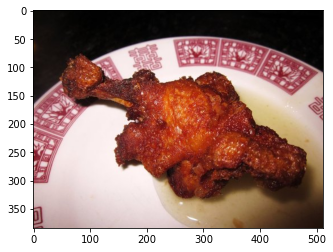

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
Not_pizza = mpimg.imread("918598.jpg")
plt.imshow(Not_pizza)

In [75]:
Not_pizza.shape

(384, 512, 3)

In [76]:
Not_pizza1 = load_and_prep_image('918598.jpg')
Not_pizza

array([[[ 12,  11,   7],
        [ 12,  11,   7],
        [ 12,  11,   7],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 12,  11,   7],
        [ 12,  11,   7],
        [ 12,  11,   7],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 12,  11,   7],
        [ 12,  11,   7],
        [ 12,  11,   7],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[161, 127, 128],
        [164, 130, 131],
        [167, 133, 134],
        ...,
        [ 31,  18,  10],
        [ 31,  18,  10],
        [ 31,  18,  10]],

       [[169, 119, 128],
        [168, 118, 127],
        [162, 115, 121],
        ...,
        [ 31,  18,  10],
        [ 31,  18,  10],
        [ 31,  18,  10]],

       [[143,  85,  97],
        [135,  79,  90],
        [121,  65,  74],
        ...,
        [ 30,  17,   9],
        [ 30,  17,   9],
        [ 30,  17,   9]]

In [77]:
pred2 = model.predict(tf.expand_dims(Not_pizza1, axis=0))
pred2

1/1 [==============================] - 0s 409ms/step


array([[0.10428452]], dtype=float32)

In [78]:
import pathlib
data_dir = pathlib.Path('./pizza_not_pizza/Train/')
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['not pizza' 'pizza']


In [83]:
pred_class = class_name[int(tf.round(pred2))]
pred_class

'not pizza'

In [80]:
def pred_and_plot(model,filename,):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0)) 
    pred_class = class_name[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')

1/1 [==============================] - 0s 360ms/step


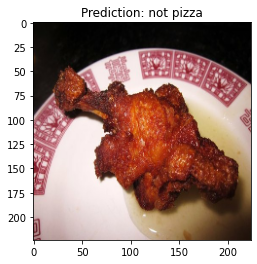

In [81]:
pred_and_plot(model,"918598.jpg")

In [82]:
from keras.models import load_model
model.save('model3.h5')